In [1]:
import pandas as pd
import pylab as plt 
import seaborn as sns
import numpy as np
from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Function Definition

In [2]:
# The p_value is returned to verify Stationarity
def p_value(df_value):
    result = adfuller(df_value.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: {}'.format(result[1]))

In [3]:
# Correlation and Differencing Plots (1 e 2).
def Differencing_Plot(df_value):  
    
    fig, axes = plt.subplots(2, 2, figsize=(8, 6))
    axes[0, 0].plot(df_value)
    axes[0, 0].set_title('Original Series')
    plot_acf(df_value, ax=axes[0, 1])

    axes[1, 0].plot(df_value.diff())
    axes[1, 0].set_title('1st Order Differencing')
    plot_acf(df_value.diff().dropna(), ax=axes[1, 1])

    fig.tight_layout()
    return plt.show()

## Creation of the New DataSet for Time Serie

In [4]:
Temperature = pd.read_csv('Temperature.csv')
Temperature

,dt,City,Country,AverageTemperature,ANNO
0,1743-11-01,Århus,Denmark,6.068000,1743
1,1744-04-01,Århus,Denmark,5.788000,1744
2,1744-05-01,Århus,Denmark,10.644000,1744
3,1744-06-01,Århus,Denmark,14.051000,1744
4,1744-07-01,Århus,Denmark,16.082000,1744
...,...,...,...,...,...
8256236,2019-08-01,Cheyenne,US,21.555556,2019
8256237,2019-09-01,Cheyenne,US,22.888889,2019
8256238,2019-10-01,Cheyenne,US,7.055556,2019
8256239,2019-11-01,Cheyenne,US,-0.666667,2019


In [5]:
Temperature.dtypes

dt                     object
City                   object
Country                object
AverageTemperature    float64
ANNO                    int64
dtype: object

In [6]:
print(Temperature.isnull().sum())  

dt                    0
City                  0
Country               0
AverageTemperature    0
ANNO                  0
dtype: int64


In [7]:
#dt column type transformation
Temperature['dt']= pd.to_datetime(Temperature['dt'])

In [8]:
#selection of Milan data only
TempRo = Temperature.loc[(Temperature['City'] == 'Rome')]
TempRo.reset_index(inplace=True, drop=True)
TempRo

,dt,City,Country,AverageTemperature,ANNO
0,1743-11-01,Rome,Italy,8.248000,1743
1,1744-04-01,Rome,Italy,12.154000,1744
2,1744-05-01,Rome,Italy,13.667000,1744
3,1744-06-01,Rome,Italy,18.179000,1744
4,1744-07-01,Rome,Italy,21.030000,1744
...,...,...,...,...,...
3233,2019-08-01,Rome,Italy,24.888889,2019
3234,2019-09-01,Rome,Italy,25.333333,2019
3235,2019-10-01,Rome,Italy,22.333333,2019
3236,2019-11-01,Rome,Italy,17.833333,2019


In [9]:
#Preparation to display the time series
TempRo1= TempRo[['dt','AverageTemperature']]
TempRo1.set_index('dt', inplace = True)
TempRo1

,AverageTemperature
dt,
1743-11-01,8.248000
1744-04-01,12.154000
1744-05-01,13.667000
1744-06-01,18.179000
1744-07-01,21.030000
...,...
2019-08-01,24.888889
2019-09-01,25.333333
2019-10-01,22.333333


# Time Series

<AxesSubplot:xlabel='dt'>

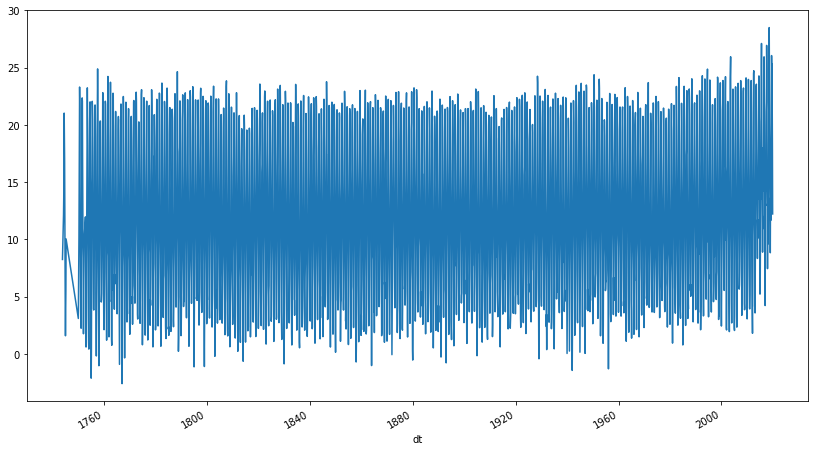

In [10]:
TempRo1['AverageTemperature'].plot(figsize=(14,8))

In [11]:
#selection only a few years
interval_year = (TempRo['ANNO'] > 1989) & (TempRo['ANNO'] <2020)
TempRo2 = TempRo.loc[interval_year]
TempRo2

,dt,City,Country,AverageTemperature,ANNO
2882,1990-01-01,Rome,Italy,3.871000,1990
2883,1990-02-01,Rome,Italy,7.003000,1990
2884,1990-03-01,Rome,Italy,9.140000,1990
2885,1990-04-01,Rome,Italy,9.572000,1990
2886,1990-05-01,Rome,Italy,15.698000,1990
...,...,...,...,...,...
3233,2019-08-01,Rome,Italy,24.888889,2019
3234,2019-09-01,Rome,Italy,25.333333,2019
3235,2019-10-01,Rome,Italy,22.333333,2019
3236,2019-11-01,Rome,Italy,17.833333,2019


In [12]:
#Preparation to display the time series
TempRo2= TempRo2[['dt','AverageTemperature']]
TempRo2.set_index('dt', inplace = True)
TempRo2

,AverageTemperature
dt,
1990-01-01,3.871000
1990-02-01,7.003000
1990-03-01,9.140000
1990-04-01,9.572000
1990-05-01,15.698000
...,...
2019-08-01,24.888889
2019-09-01,25.333333
2019-10-01,22.333333


<AxesSubplot:xlabel='dt'>

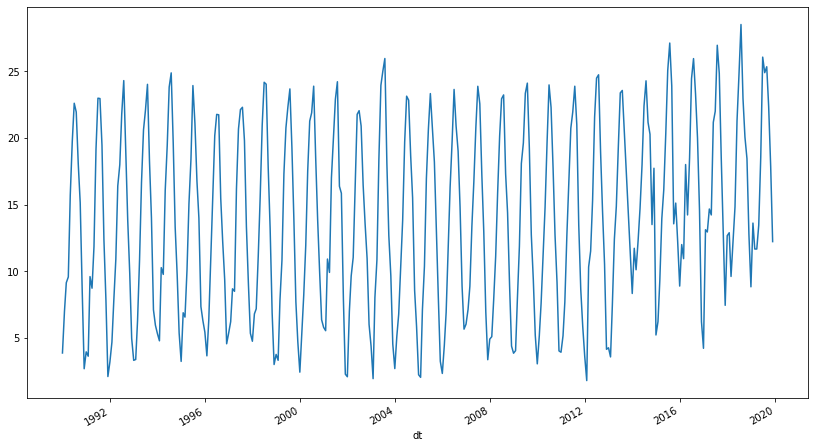

In [13]:
TempRo2['AverageTemperature'].plot(figsize=(14,8))

## Seasonality

Seasonality in time-series data refers to a pattern that occurs at a regular interval. 

### Additive Seasonal Decompose

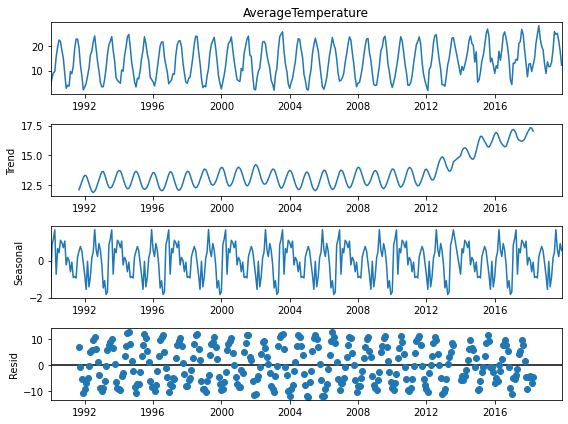

In [14]:
# Seasonal Variation Analyzing
plt.rcParams.update({'figure.figsize': (8,6)})
result_add = seasonal_decompose(TempRo2['AverageTemperature'], model = 'additive', period = 40)
decomposition_result = result_add.plot()

## Stationarity

A stationary time series is a series whose statistical properties are independent of the point in time at which they are observed. This Means that Mean, variance and other statistics of a stationary time series remains constant.
The p-value represents a probability of the error when expecting, that the trend differs from zero. Returning p_value to verify Stationarity.

In [15]:
# ADF calculation
p_value(TempRo2['AverageTemperature'])

ADF Statistic: -0.952577
p-value: 0.7701657915514599


### Differencing

Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) Trend and Seasonality.

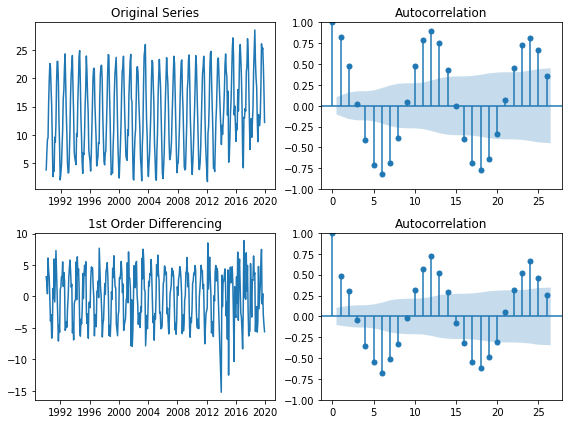

In [16]:
# Differencing plots representation
Differencing_Plot(TempRo2['AverageTemperature'])

In [17]:
# ADF calculation
p_value(TempRo2['AverageTemperature'].diff())

ADF Statistic: -9.709340
p-value: 1.0214854636723916e-16


### Showing Autocorrelation Coefficents

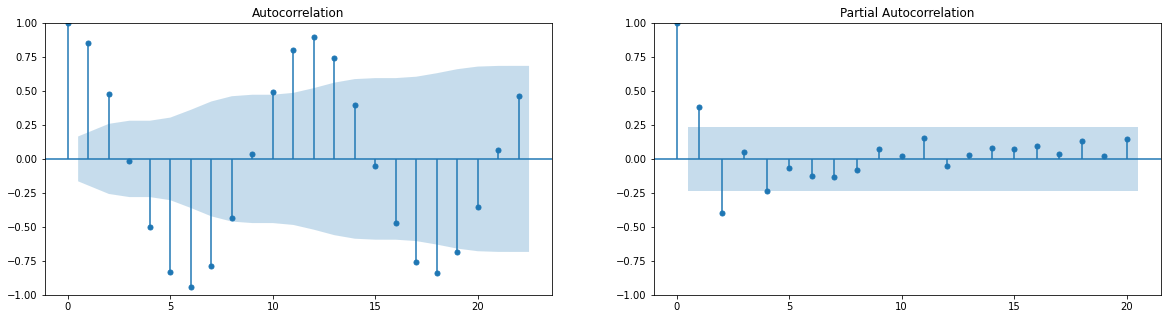

In [18]:
lag_acf= acf(TempRo2, nlags = 140)
lag_pacf= pacf(TempRo2, nlags = 70)
fig, ax = plt.subplots(1,2,figsize =(20,5))
plot_acf(lag_acf, ax=ax[0])
plot_pacf(lag_pacf, lags=20, ax=ax[1])
plt.show()

## Model Creation

In [19]:
# Finding best p and q for the analysis

def findBestComposition(train, test):
    vMax = 3
    ps = []
    qs = []
    vs = []
    best_p = 0
    best_q = 0
    bestValue = None
    history = [x for x in train]
    predictions = []
    
    # Trying p from 0 to 2
    for p in range(vMax):
        # Trying q from 0 to 2
        for q in range(vMax):
            history = [x for x in train]
            predictions = []
            
            # Generating SARIMA model with specific p and q
            for t in range(len(test)):
                model = SARIMAX(history, order=(p,1,q), seasonal_order=(0, 1, 0, 12))
                model_fit = model.fit()
                output = model_fit.forecast()
                yhat = output[0]
                predictions.append(yhat)
                obs = test[t]
                history.append(obs)
                
            # Computing RMSE for the generated Model
            rmse = sqrt(mean_squared_error(test, predictions))
            if bestValue is None or rmse < bestValue:
                bestValue = rmse
                best_p = p
                best_q = q
            ps.append(p)
            qs.append(q)
            vs.append(rmse)
            
    # Creating a df containing RMSE for each p and q composition
    data = pd.DataFrame({'P': ps, 'Q': qs, 'RMSE': vs})
    return data.pivot('P', 'Q', 'RMSE'), bestValue, best_p, best_q

In [20]:
# Creating the model for the specific DF

def generateModel(analysis_df, title):
    
    # DF Manipulation
    df = analysis_df.copy()
    
    # Creating Train and Test set
    X = df.values
    size = int(len(X) * 0.85)
    train, test = X[0:size], X[size:len(X)]
    
    # Finding best p and q
    data_pivoted, rsme, p ,q = findBestComposition(train, test)
    
    history = [x for x in train]
    predictions = []
    
    # Creating SARIMA Model
    for t in range(len(test)):
        model = SARIMAX(history, order=(p,1,q), seasonal_order=(0, 1, 0, 12))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    
    # Computing RMSE with model results
    rmse = sqrt(mean_squared_error(test, predictions))
    print(rmse)
    
    array = df.index.values
    assex = []
    for i in range(len(df.index)-len(test), len(df.index)):
        assex.append(array[i])
    
    # Plotting Heatmap with p and q composition
    ax = sns.heatmap(data_pivoted, cmap="coolwarm")
    ax.set_title('Best RMSE:{0} with p:{1} q:{2}'.format(int(rsme), p, q))
    plt.show()
    
    # Plotting real and predicted data
    fig, ax = plt.subplots(figsize=(15,5))
    plt.plot(assex, test, label='Test Data')
    plt.title(title.format(int(rsme), p, q))
    plt.plot(assex, predictions, color='orange', label='Predicted Data')
    ax.legend()
    plt.show()
    
    
    # Predicting Future Data from 2020 to 2021
    start = datetime.strptime("2020-01-01", "%Y-%m-%d")
    date_list = [start + relativedelta(months=x) for x in range(0,12)]
    future = pd.DataFrame(index=date_list, columns= df.columns)
    future['events'] = model_fit.predict(start = len(df), end = len(df)+11, dynamic= True)
    
    # Ploting Future Data from 2020 to 2021
    fig, ax = plt.subplots(figsize=(15,5))
    chart = sns.lineplot(data = future['events'], palette=['blue'])
    chart.set_title('Forcasted Data for '+title)

3.253133733947882


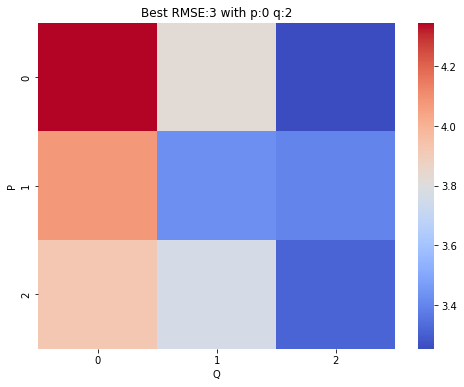

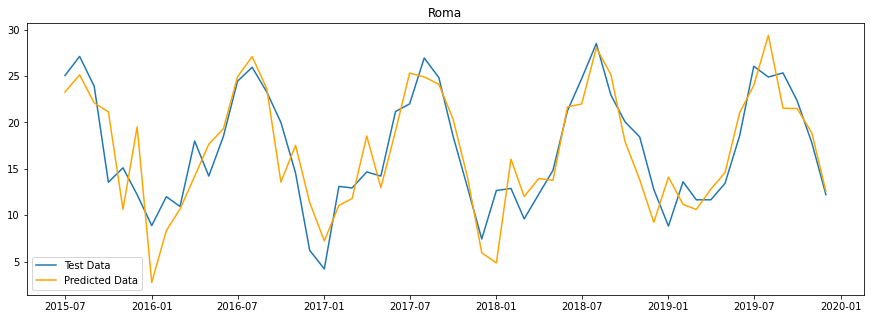

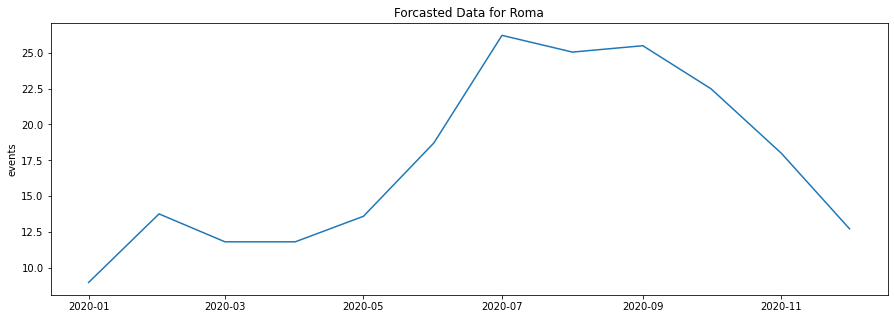

In [21]:
# Generating Model

generateModel(TempRo2, 'Roma')

In [22]:
################################################################################################################################

In [23]:
# Dynamic function to divide Dataset into testing and training set 
def Dynamic_Splitting (parDf,parColumn,parTrainSize):
    
    # Test e Train DataSet creation
    train_size = parTrainSize
    split_idx = round(len(TempRo2["AverageTemperature"])* train_size)

    # Split
    train = TempRo2.iloc[:split_idx]
    test = TempRo2.iloc[split_idx:]
    

    # Visualize split
    fig,ax= plt.subplots(figsize=(15,8))
    kws = dict(marker='o')
    plt.plot(train, label='Train', **kws)
    plt.plot(test, label='Test', **kws)
    ax.legend(bbox_to_anchor=[1,1]);
    
    return train, test

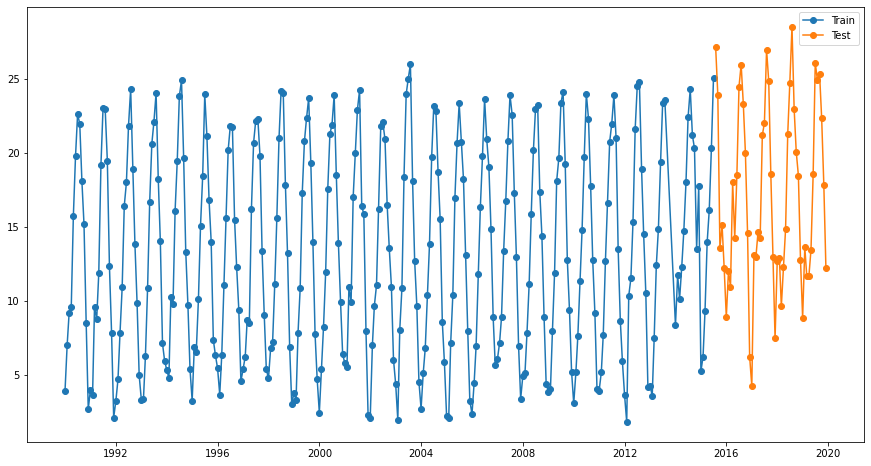

In [24]:
train, test = Dynamic_Splitting(TempRo2,"AverageTemperature",0.85)

## LSTM Forecasting

LSTM allows to predict the future values of a Time Serie adopting a Machine Learning approach

Before to start Training and Testing data are scaled. Here the minimum value n the dataset is subtracted of the features, then the elements into the dataset are divided from the Range (Max Value - Min Value) 

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
TempRo2.head(),TempRo2.tail()

(            AverageTemperature
 dt                            
 1990-01-01               3.871
 1990-02-01               7.003
 1990-03-01               9.140
 1990-04-01               9.572
 1990-05-01              15.698,
             AverageTemperature
 dt                            
 2019-08-01           24.888889
 2019-09-01           25.333333
 2019-10-01           22.333333
 2019-11-01           17.833333
 2019-12-01           12.222222)

In [27]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [28]:
scaled_train[:10]

array([[0.08567643],
       [0.21537124],
       [0.30386351],
       [0.32175245],
       [0.57542755],
       [0.74263945],
       [0.86111226],
       [0.83394758],
       [0.6728643 ],
       [0.55244524]])

In [29]:
# Generator Definition for 12 month
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size = 1)

In [30]:
X,y = generator[0]
print(f'Array: \n{X.flatten()}')
print(f'Prediction: \n{y}')

Array: 
[0.08567643 0.21537124 0.30386351 0.32175245 0.57542755 0.74263945
 0.86111226 0.83394758 0.6728643  0.55244524 0.27806534 0.03677171]
Prediction: 
[[0.08919624]]


In [31]:
X.shape  #N_Rows, N_Columns, N_Features

(1, 12, 1)

## LSTM Model Implementation

At this point the LSTM model can be defined. Activation and Loss Functions are required, where the first has 'tanh' as default value, but in this case ReLU function is preferred to guarantee better quality to the neural unit (bounded, monotony, easy to handle)   

In [32]:
# Model Definition
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, activation = 'relu', input_shape = (n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [34]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
291/291 [==============================] - 1s 2ms/step - loss: 0.0645
Epoch 2/50
291/291 [==============================] - 1s 3ms/step - loss: 0.0208
Epoch 3/50
291/291 [==============================] - 1s 2ms/step - loss: 0.0129
Epoch 4/50
291/291 [==============================] - 1s 2ms/step - loss: 0.0114
Epoch 5/50
291/291 [==============================] - 1s 2ms/step - loss: 0.0098
Epoch 6/50
291/291 [==============================] - 1s 2ms/step - loss: 0.0110
Epoch 7/50
291/291 [==============================] - 1s 2ms/step - loss: 0.0096
Epoch 8/50
291/291 [==============================] - 1s 3ms/step - loss: 0.0092
Epoch 9/50
291/291 [==============================] - 1s 2ms/step - loss: 0.0087
Epoch 10/50
291/291 [==============================] - 1s 2ms/step - loss: 0.0101
Epoch 11/50
291/291 [==============================] - 1s 2ms/step - loss: 0.0084
Epoch 12/50
291/291 [==============================] - 1s 2ms/step - loss: 0.0095
Epoch 13/50
291/291 [====

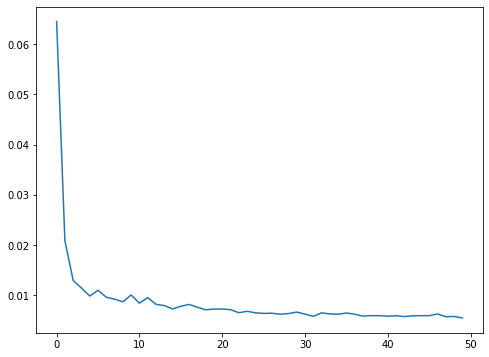

In [35]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [36]:
last_train_batch = scaled_train[-12:]

In [37]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [38]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 113ms/step


array([[0.96179223]], dtype=float32)

In [39]:
scaled_test[0]

array([1.04803972])

In [40]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 18ms/step


In [41]:
test_predictions

[array([0.96179223], dtype=float32),
 array([0.8339934], dtype=float32),
 array([0.62794316], dtype=float32),
 array([0.40310842], dtype=float32),
 array([0.25866833], dtype=float32),
 array([0.13291712], dtype=float32),
 array([0.15733466], dtype=float32),
 array([0.24847405], dtype=float32),
 array([0.38403028], dtype=float32),
 array([0.53957593], dtype=float32),
 array([0.7284143], dtype=float32),
 array([0.901276], dtype=float32),
 array([0.9498811], dtype=float32),
 array([0.81719726], dtype=float32),
 array([0.5929438], dtype=float32),
 array([0.38042182], dtype=float32),
 array([0.18938759], dtype=float32),
 array([0.1007379], dtype=float32),
 array([0.12100245], dtype=float32),
 array([0.2104294], dtype=float32),
 array([0.33991238], dtype=float32),
 array([0.49586946], dtype=float32),
 array([0.68809384], dtype=float32),
 array([0.8664935], dtype=float32),
 array([0.93944836], dtype=float32),
 array([0.8215372], dtype=float32),
 array([0.6022773], dtype=float32),
 array([0.39

In [42]:
test.head()

,AverageTemperature
dt,
2015-08-01,27.111111
2015-09-01,23.888889
2015-10-01,13.555556
2015-11-01,15.111111
2015-12-01,12.222222


In [43]:
true_predictions = scaler.inverse_transform(test_predictions)

In [44]:
test['Predictions'] = true_predictions

<AxesSubplot:xlabel='dt'>

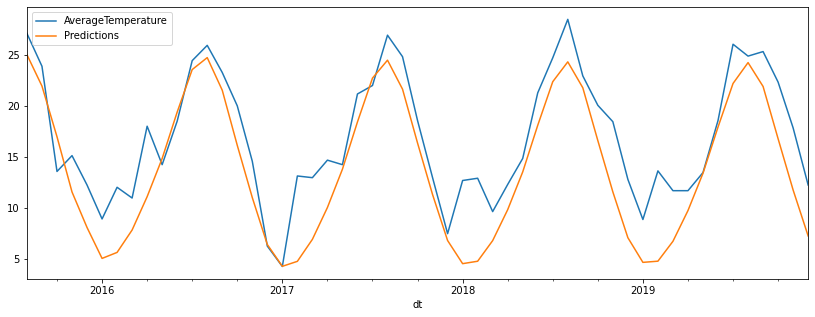

In [45]:
test.plot(figsize=(14,5))

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['AverageTemperature'],test['Predictions']))
print(rmse)

4.077579741076622
